# Deep Convolution Neural Network for MNIST and Fashion_MNIST

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist, fashion_mnist
from keras.layers import *
from keras.models import Sequential
from keras.metrics import Accuracy

**Define hyperparameters**

In [ ]:
batch_size = 128
epochs = 30


**Load the dataset from the necessary dataset**

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalise the training and testing datasets
train_images = train_images / 255.0
test_images = test_images/ 255.0

# reshape images
train_images = np.expand_dims(train_images, 3)
test_images = np.expand_dims(test_images, 3)
train_images.shape

11490434/11490434 [==============================] - 2s 0us/step


(60000, 28, 28, 1)

In [ ]:
digits_dict = {0: 'zero',
               1: 'one',
               2: 'two',
               3: 'three',
               4: 'four',
               5: 'five',
               6: 'six',
               7: 'seven',
               8: 'eight',
               9: 'nine'}

Visualise sampled images

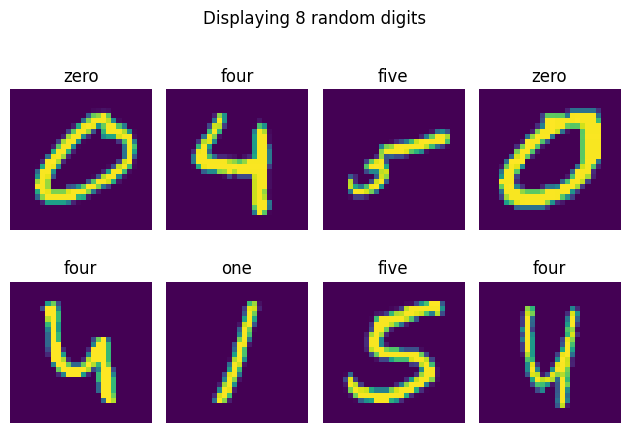

In [ ]:
def display_random_images(X, y, n=10, train=True):
    idx = np.random.randint(0, X.shape[0], n)

    image_sample = X[idx]
    label_sample = y[idx]

    fig, axes = plt.subplots(2, n//2, sharex=True, sharey=True)
    fig.suptitle('Displaying {} random digits'.format(2*(n//2)), fontdict={'weight': 'bold', 'size': 20})

    # plt.subplots_adjust(wspace=0.1, hspace=-.65, top=1.2)

    for i, ax in enumerate(axes.flat):
        ax.imshow(image_sample[i])
        ax.set(title=digits_dict[label_sample[i]])
        ax.set_axis_off()
        plt.tight_layout()

display_random_images(train_images, train_labels, n=8)


Build the deep convolutional graph

In [ ]:
model = Sequential(name='Deep_Conv_NN')

model.add(Conv2D(filters=16, kernel_size=3, padding='same', input_shape=(train_images.shape[1:]), activation='relu'))
model.add(MaxPooling2D(pool_size=3))

model.add(Flatten())

model.add(Dense(units=128, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

model.summary()

Model: "Deep_Conv_NN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 9, 9, 16)          0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 1296)              0         
                                                                 
 dense (Dense)               (None, 128)               166016    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 167466 (654.16 KB)
Trainable params: 167466 (654.16 KB)
Non-trainable params: 0 (0.00 Byte)
______________

Compile model with optimiser and criterion (loss) and train

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_split=.12)

Epoch 1/30
413/413 [==============================] - 9s 5ms/step - loss: 0.3495 - accuracy: 0.9012 - val_loss: 0.1159 - val_accuracy: 0.9689
Epoch 2/30
413/413 [==============================] - 2s 5ms/step - loss: 0.1078 - accuracy: 0.9680 - val_loss: 0.0773 - val_accuracy: 0.9797
Epoch 3/30
413/413 [==============================] - 2s 5ms/step - loss: 0.0750 - accuracy: 0.9776 - val_loss: 0.0628 - val_accuracy: 0.9814
Epoch 4/30
413/413 [==============================] - 2s 4ms/step - loss: 0.0608 - accuracy: 0.9812 - val_loss: 0.0649 - val_accuracy: 0.9821
Epoch 5/30
413/413 [==============================] - 2s 4ms/step - loss: 0.0512 - accuracy: 0.9840 - val_loss: 0.0606 - val_accuracy: 0.9831
Epoch 6/30
413/413 [==============================] - 2s 4ms/step - loss: 0.0432 - accuracy: 0.9868 - val_loss: 0.0590 - val_accuracy: 0.9842
Epoch 7/30
413/413 [==============================] - 2s 4ms/step - loss: 0.0359 - accuracy: 0.9886 - val_loss: 0.0517 - val_accuracy: 0.9858
Epoch 

Visualise training and valdation metrics

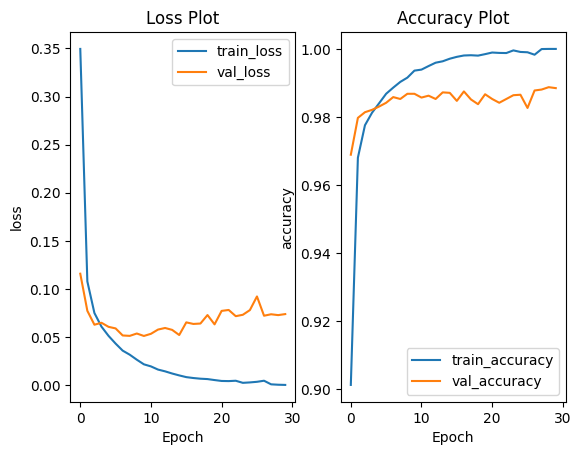

In [ ]:
fig, (ax_loss, ax_acc) = plt.subplots(1, 2)

# plot the losses
ax_loss.plot(range(epochs), history.history['loss'], label='train_loss')
ax_loss.plot(range(epochs), history.history['val_loss'], label='val_loss')
ax_loss.set(title='Loss Plot',
            xlabel='Epoch',
            ylabel='loss')
ax_loss.legend()

# plot the accuracies
ax_acc.plot(range(epochs), history.history['accuracy'], label='train_accuracy')
ax_acc.plot(range(epochs), history.history['val_accuracy'], label='val_accuracy')
ax_acc.set(title='Accuracy Plot',
            xlabel='Epoch',
            ylabel='accuracy')
ax_acc.legend()

plt.show()

Save model

In [ ]:
model.save('cnn_mnist_tf.keras')

Load and Evaluate model

In [ ]:
loaded_model = keras.models.load_model('cnn_mnist_tf.keras')

eval_images, eval_labels = test_images[:8000], test_labels[:8000]

loss, accuracy = loaded_model.evaluate(eval_images, eval_labels, workers=2)

print(f'eval_loss: {loss:.4f}\neval_accuracy:{accuracy:.4f}')

250/250 [==============================] - 1s 2ms/step - loss: 0.0573 - accuracy: 0.9880
eval_loss: 0.0573
eval_accuracy:0.9880


Use loaded model for inferencing

In [ ]:
pred = loaded_model.predict(test_images[8000:])

63/63 [==============================] - 0s 3ms/step


Test on never seen images

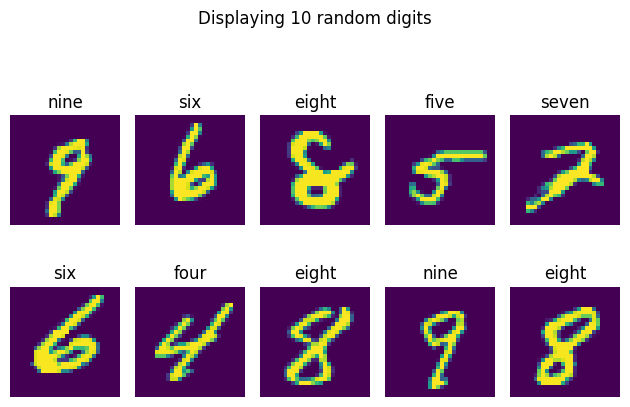

In [ ]:
images, labels = test_images[8000:], test_labels[8000:]

display_random_images(images, pred.argmax(1), train=False)